In [14]:
%matplotlib inline
import scipy as sp
from scipy import integrate, special
import matplotlib.pyplot as plt
from sumrules.lib.legacy_analytics import sqedMP2onsh, sqedMP2, sqedMP0onsh, sqedMP0, psiColP
from sumrules.lib.evaluators import McolPEvaluator
from sumrules import constants

What is the difference between the *low-energy* and *on-shell* reduction applied to matrix elements?

In [15]:
MP = McolPEvaluator(sqedMP2, psiColP)
MPonsh = McolPEvaluator(sqedMP2onsh, psiColP)

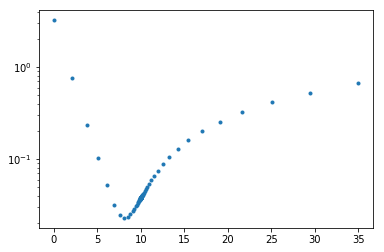

In [44]:
points = 10 - sp.exp(sp.linspace(sp.log(10-1e-10), sp.log(1e-4), 50))
points = sp.hstack((points, 10 + sp.exp(sp.linspace(sp.log(1e-4), sp.log(25), 50))))

res1 = MPonsh.McolP_f(sp.vstack((points, sp.full_like(points, 0.2), sp.full_like(points, 0))), 10, 8, 0.2, 1.2)
res1 = sp.apply_along_axis(sp.linalg.norm, -1, res1)

res2 = MP.McolP_f(sp.vstack((points, sp.full_like(points, 0.2), sp.full_like(points, 0))), 10, 8, 0.2, 1.2)
res2 = sp.apply_along_axis(sp.linalg.norm, -1, res2)
plt.yscale("log")
plt.plot(points, res1/res2, ".")

From the plot above, one can conclude, that *low-energy* reduction is applicable only near $p = q$ region. But, as follows from a plot below, the peak is quite sharp, so it may be possible to integrate only around peak, and apply such an approximation.

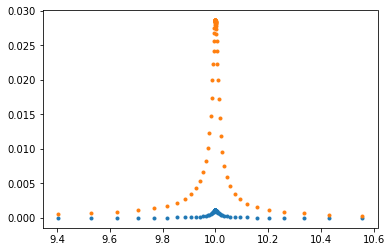

In [57]:
plt.plot(points[12:85], res1[12:85], ".")
plt.plot(points[12:85], res2[12:85], ".")